# 퍼셉트론

### #01. 퍼셉트론의 이해

- 인공신경망(딥러닝)의 기원이 되는 알고리즘
- 하나 이상의 신호를 입력받아 어떠한 계산을 수행한 후 하나의 Output을 출력한다.
- 퍼셉트론은 1과 0의 신호만 가질 수 있다.
- 신호가 흐르면 1, 흐르지 않으면 0이다.

#### 1. input이 2개인 퍼셉트론

- $x_1$과 $x_2$는 입력 신호, $y$는 출력 신호, $w_1$과 $w_2$는 가중치를 의미한다. ($w$ : weight)
- $**x$와 가중치 $w$를 곱한 값을 모두 더하여 하나의 값($y$)로 만들어 낸다.**
- 입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해지고 그 값들을 모두 더해서 나온 값($y$)이 어떠한 임계값(θ)을 넘을 때만 1로 출력한다.
- 신경망에서 만들어진 값($y$)을 적절한 출력값으로 변환해 주는 함수를 **활성화 함수**라고 한다.
- 입력 신호와 출력 신호를 담고있는 원은 **노드** 혹은 **뉴런**이라 부른다.

![퍼셉트론](res/per.png)

#### y를 수식으로 나타내기

$$y = \left \{ \begin{array}{cc} {0(w_1x_1 + w_2x_2 \leq \theta)}\\{1(w_1x_1 + w_2x_2 > \theta)}\end{array} \right.$$

#### 2. 논리회로

- 논리 연산을 통해 전기 장치를 제어하는 통로.
- 컴퓨터 및 기타 전기 장치를 작동하게 만드는 기본 부품이다.
- 불 대수를 이용하여 설계
- 여러 입력을 해도 1개의 출력만 나온다.

![논리회로](res/logic.png)

#### 3. 게이트

- 논리 회로의 기초 구성요소.
- 각 게이트는 논리 연산 하나를 구현한다.

![게이트](res/gate.jpg)

##### 게이트의 종류

![게이트의 종류](res/gate2.png)

퍼셉트론과 논리회로의 원리가 동일하기 때문에 퍼셉트론을 사용하여 논리회로를 구현할 수 있다.

### #02. 퍼셉트론 구현하기

#### 1. 패키지 참조하기

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense      # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import SGD    # 옵티마이저
from tensorflow.keras.losses import mse        # OR게이트에서 사용할 활성화 함수
from pandas import DataFrame

#### 2. AND 게이트

##### 1) 데이터셋 준비하기

랜덤 시드값 고정

In [2]:
np.random.seed(777)

데이터 셋 구성

In [3]:
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [0], [0], [1]])

##### 3) 데이터 전처리 
- 간단한 데이터로 이 예제에서는 수행 x

##### 4) 탐색적 데이터 분석

In [4]:
# faltten : 무조건 1차원으로 풀어버린다. 
# reshape(-1) : 1차원만 낮추기
label = train_y.flatten()
df = DataFrame(train_x, index=label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
0,1,0
0,0,1
1,1,1


##### 5) 데이터 셋 분할하기

> ###### 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 여기서는 진행하지 않음.

##### 6) 모델 개발

모델 정의

In [5]:
model = Sequential()
model.add(Dense(1, input_shape=(2, ), activation='linear'))
model.compile(optimizer= SGD(), loss=mse, metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습하기

In [6]:
hist = model.fit(train_x, train_y, epochs=500)

result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
1/1 [==============================] - 0s 380ms/step - loss: 0.7104 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6734 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6388 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6062 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5757 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5470 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5202 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4949 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4713 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4490 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.428

,loss,acc
epochs,,
1,0.710413,0.5
2,0.673446,0.5
3,0.638765,0.5
4,0.606226,0.5
5,0.575694,0.5
...,...,...
496,0.063619,1.0
497,0.063611,1.0
498,0.063603,1.0


##### 7) 학습결과 평가

평가결과 시각화

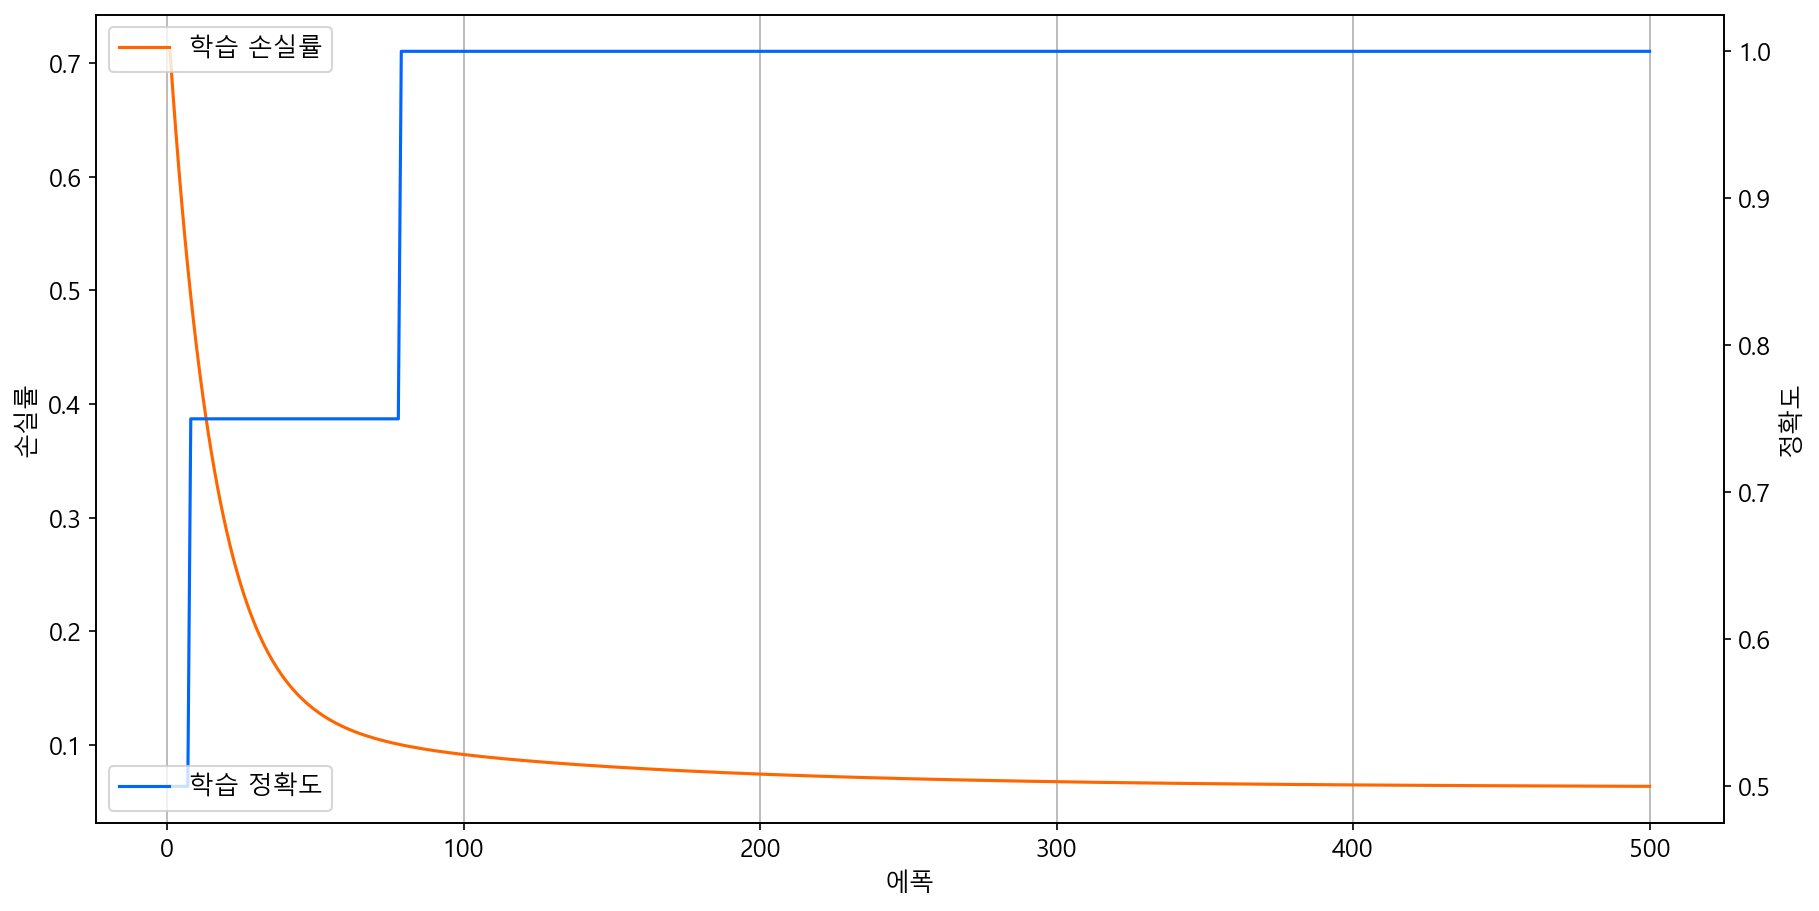

In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(data=result_df, x=result_df.index, y='loss', color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(data=result_df, x=result_df.index, y='acc', color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

모델 성능 평가

In [8]:
ev = model.evaluate(train_x, train_y)
print("손실률: %0.2f%%, 정확도: %0.2f%%" % (ev[0], ev[1]))

1/1 [==============================] - 0s 166ms/step - loss: 0.0636 - acc: 1.0000
손실률: 0.06%, 정확도: 1.00%


가중치, 편향 확인

In [9]:
weight, bias = model.get_weights()
print("가중치: %s" % weight.flatten())
print("편향: %s" % bias.flatten())

가중치: [0.5632372 0.5110604]
편향: [-0.29406363]


##### 8) 학습 결과 적용

단일 데이터에 대한 예측치 산정

In [10]:
r00 = model.predict([[0, 0]])
r00

1/1 [==============================] - 0s 137ms/step


array([[-0.29406363]], dtype=float32)

In [11]:
result = "%s OR %s => %s" % (bool(0), bool(0), bool(round(r00[0,0])))
result

'False OR False => False'

학습 데이터 전체를 활용하여 예측값 만들기

In [12]:
r = model.predict(train_x)
r

1/1 [==============================] - 0s 27ms/step


array([[-0.29406363],
       [ 0.26917356],
       [ 0.21699679],
       [ 0.78023404]], dtype=float32)

In [13]:
df['예측값'] = r.reshape(-1).round()
df

,x1,x2,예측값
y,,,
0,0,0,-0.0
0,1,0,0.0
0,0,1,0.0
1,1,1,1.0


### 3. OR 게이트

#### 1) 데이터 셋 준비하기

##### 랜덤 시드값 고정

# ...

In [14]:
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [1], [1], [1]])

In [15]:
label = train_y.flatten()
df = DataFrame(train_x, index=label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
1,1,1


In [16]:
model = Sequential()
model.add(Dense(1, input_shape = (2, ), activation = 'linear'))
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
hist = model.fit(train_x, train_y, epochs=500)

result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
1/1 [==============================] - 0s 224ms/step - loss: 0.7234 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6973 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6728 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6496 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6277 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6071 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5876 - acc: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5691 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5517 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5352 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.519

,loss,acc
epochs,,
1,0.723395,0.5
2,0.697342,0.5
3,0.672771,0.5
4,0.649589,0.5
5,0.627711,0.5
...,...,...
496,0.064741,1.0
497,0.064719,1.0
498,0.064698,1.0


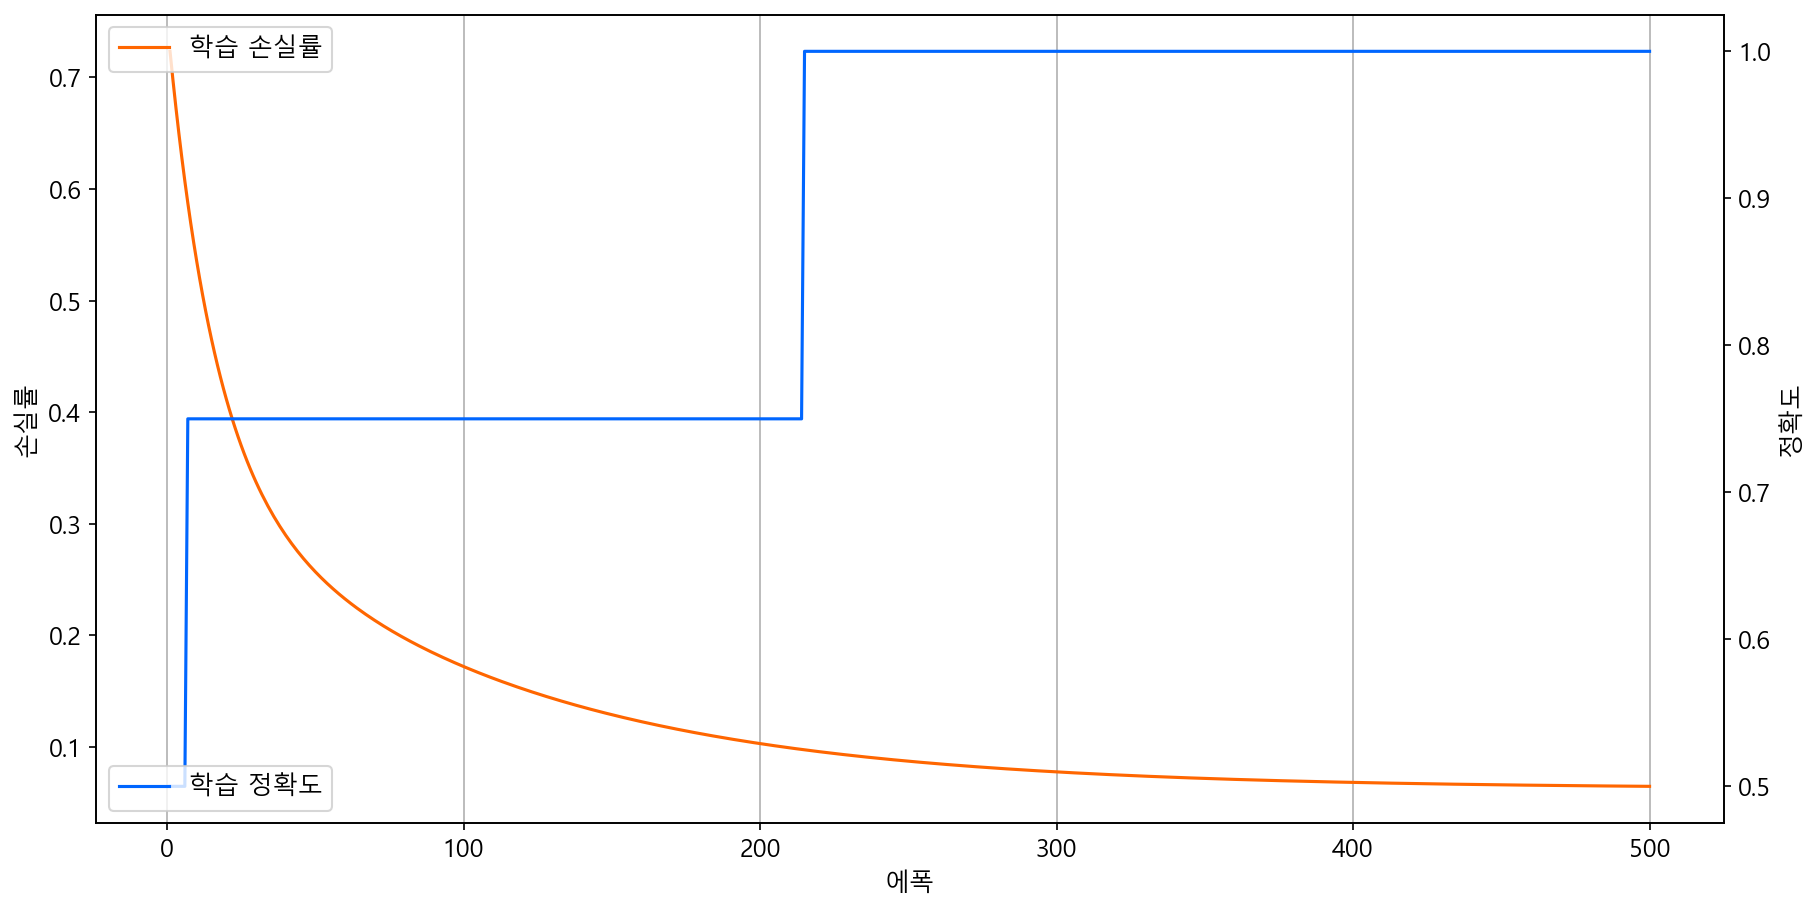

In [18]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(data=result_df, x=result_df.index, y='loss', color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(data=result_df, x=result_df.index, y='acc', color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

In [19]:
ev = model.evaluate(train_x, train_y)
print("손실률: %0.2f%%, 정확도: %0.2f%%" % (ev[0], ev[1]))

1/1 [==============================] - 0s 102ms/step - loss: 0.0646 - acc: 1.0000
손실률: 0.06%, 정확도: 1.00%


In [20]:
weight, bias = model.get_weights()
print("가중치: %s" % weight.flatten())
print("편향: %s" % bias.flatten())

가중치: [0.5408759  0.41746825]
편향: [0.2747048]


In [24]:
r00 = model.predict([[1, 0]])
r00

1/1 [==============================] - 0s 37ms/step


array([[0.8155807]], dtype=float32)

In [25]:
result = "%s OR %s => %s" % (bool(1), bool(0), bool(round(r00[0,0])))
result

'True OR False => True'

In [26]:
r = model.predict(train_x)
r

1/1 [==============================] - 0s 20ms/step


array([[0.2747048 ],
       [0.8155807 ],
       [0.69217306],
       [1.2330489 ]], dtype=float32)

In [27]:
df['예측값'] = r.reshape(-1).round()
df

,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
1,1,1,1.0
